In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from yolov5.yolov5 import YoloV5

In [ ]:
from yolov5.utils.image_loader import ImageLoader
import cv2

img = cv2.imread("/home/zaid/github/traffic-tracker/blob.png")
im, im0 = ImageLoader.PreprocessImage(img)

In [ ]:
preds = YoloV5.get_bounding_boxes(im = im, im0s = im0)

In [ ]:
from yolov5.utils.general import xyxy2xywh

xywhs = xyxy2xywh(preds[:, 0:4])
confs = preds[:, 4]
clss = preds[:, 5]

In [ ]:
xywhs

tensor([[459.50211, 159.58084,  84.29230,  45.92850],
        [388.49753, 172.52890,  32.13928,  25.44086],
        [116.20913, 181.44092,  61.93651,  37.51917],
        [203.40778, 158.47093,  42.34903,  17.01721],
        [365.30869, 157.47641,  26.65851,  16.36328],
        [170.82320, 159.30620,  39.59448,  17.29239],
        [324.71811, 161.22116,  51.26788,  21.46994],
        [217.00911, 283.81699, 147.58243,  85.97089],
        [382.56851, 150.45824,  19.83978,  12.66113],
        [304.84698, 154.76385,  28.20483,  18.56201],
        [ 96.64411, 159.03154,  47.12804,  18.00836]])

In [ ]:
bounding_boxes_list = []

for prediction in preds:
    x_start, y_start, x_end, y_end = preds[prediction]["bounding_box"].values()
    bounding_boxes_list.append([x_start, y_start, x_end, y_end])
    print(preds[prediction])

{'class': 0, 'bounding_box': {'x_start': 219, 'y_start': 442, 'x_end': 361, 'y_end': 496}, 'confidence': 0.2880098521709442}
{'class': 0, 'bounding_box': {'x_start': 872, 'y_start': 428, 'x_end': 957, 'y_end': 484}, 'confidence': 0.5296167731285095}
{'class': 0, 'bounding_box': {'x_start': 1118, 'y_start': 424, 'x_end': 1177, 'y_end': 462}, 'confidence': 0.5969915390014648}
{'class': 0, 'bounding_box': {'x_start': 430, 'y_start': 714, 'x_end': 872, 'y_end': 972}, 'confidence': 0.7949249744415283}
{'class': 0, 'bounding_box': {'x_start': 897, 'y_start': 443, 'x_end': 1051, 'y_end': 508}, 'confidence': 0.8087260127067566}
{'class': 0, 'bounding_box': {'x_start': 453, 'y_start': 444, 'x_end': 572, 'y_end': 496}, 'confidence': 0.8167880177497864}
{'class': 0, 'bounding_box': {'x_start': 1056, 'y_start': 440, 'x_end': 1136, 'y_end': 489}, 'confidence': 0.8201494812965393}
{'class': 0, 'bounding_box': {'x_start': 547, 'y_start': 442, 'x_end': 674, 'y_end': 493}, 'confidence': 0.8487107157707

In [ ]:
bounding_boxes_list

[[219, 442, 361, 496],
 [872, 428, 957, 484],
 [1118, 424, 1177, 462],
 [430, 714, 872, 972],
 [897, 443, 1051, 508],
 [453, 444, 572, 496],
 [1056, 440, 1136, 489],
 [547, 442, 674, 493],
 [256, 480, 442, 593],
 [1117, 471, 1214, 548],
 [1252, 402, 1505, 540]]

In [ ]:
from yolov5.utils.general import xyxy2xywh

coords = xyxy2xywh(bounding_boxes_list)

TypeError: list indices must be integers or slices, not tuple

In [ ]:
for prediction in preds:
    if preds[prediction]["confidence"] > 0.5:
        x_start, y_start, x_end, y_end = preds[prediction]["bounding_box"].values()
        if preds[prediction]["class"] == 0:
            color = (0,255,0)
        elif preds[prediction]["class"] == 1:
            color = (255,0,0)
        elif preds[prediction]["class"] == 2:
            color = (0,0,255)
        elif preds[prediction]["class"] == 3:
            color = (0,255,255)
        elif preds[prediction]["class"] == 4:
            color = (255,255,0)
        cv2.rectangle(img, (x_start, y_start), (x_end, y_end), color, 4, -1)

In [ ]:
print(img.shape)

(1040, 1920, 3)


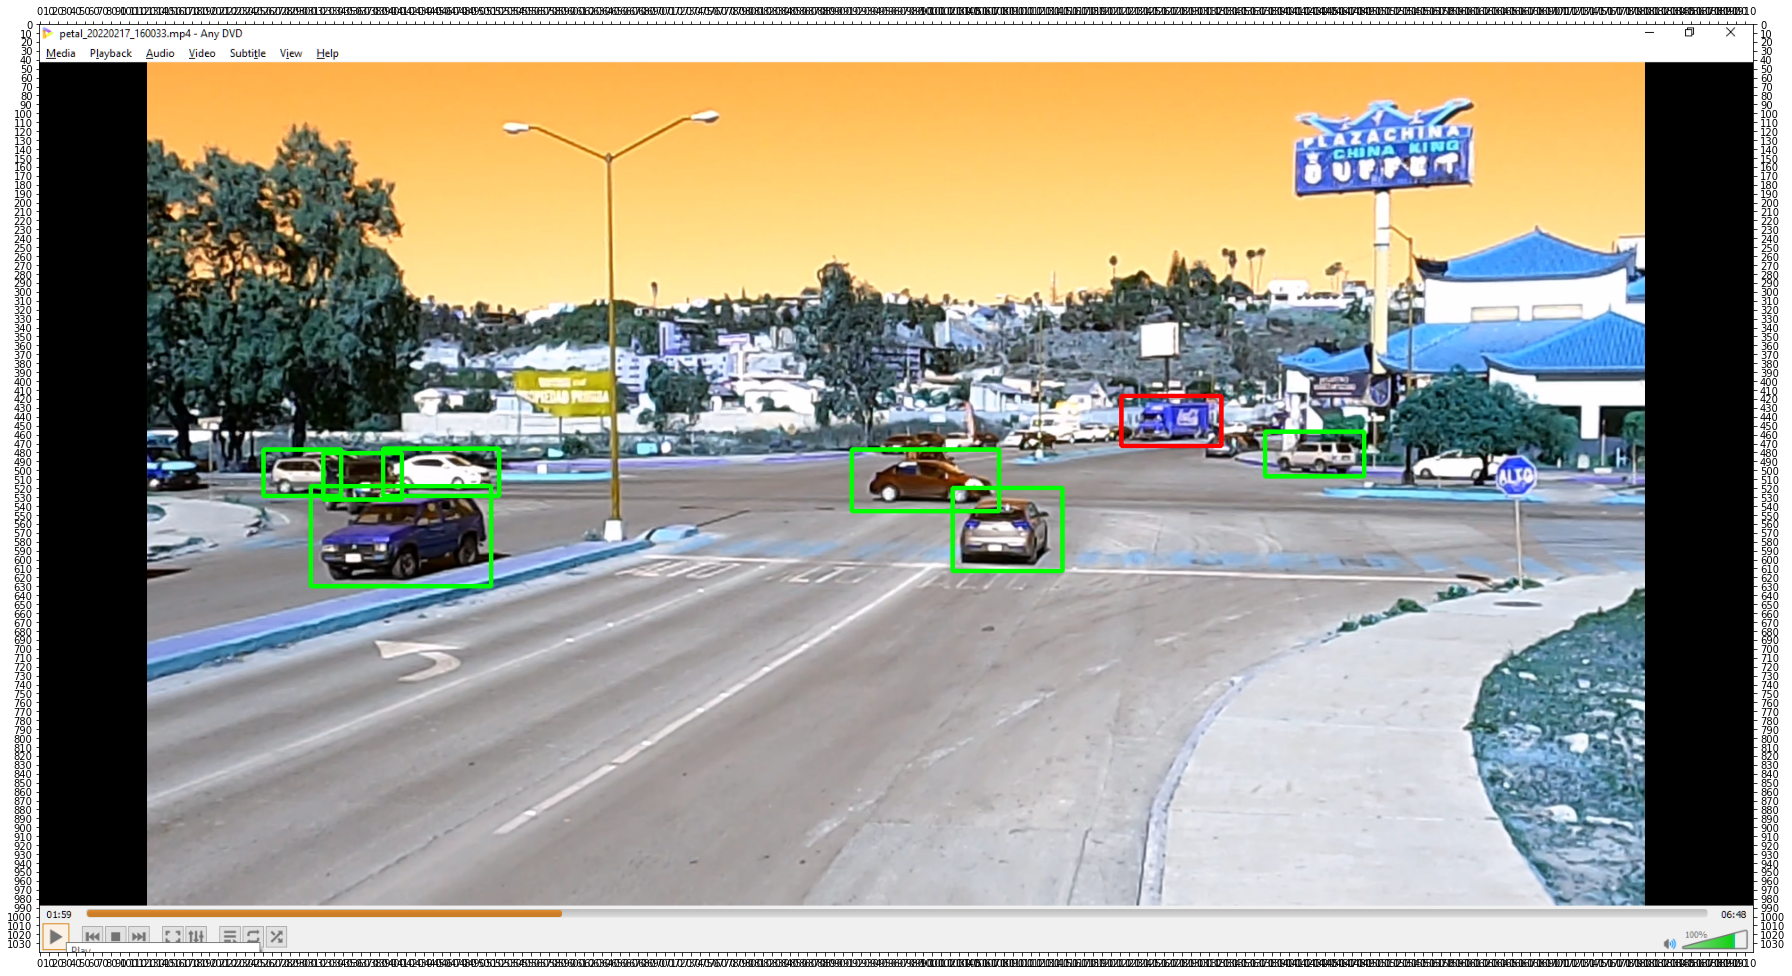

In [ ]:
from helpers.plot import plot_image_huge

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_image_huge(img)

In [ ]:
import os

root_path = "/home/zaid/Descargas/base_datos_aforo/"
img_list = [root_path + img_path for img_path in os.listdir(root_path) if img_path[-3:] == "png"]
for img_path in img_list[:3]: 
    img = cv2.imread(img_path)
    im, im0 = ImageLoader.PreprocessImage(img)
    preds = YoloV5.get_bounding_boxes(im = im, im0s = im0)
    for prediction in preds:
        if preds[prediction]["confidence"] > 0.5:
            x_start, y_start, x_end, y_end = preds[prediction]["bounding_box"].values()
            if preds[prediction]["class"] == 0:
                color = (0,255,0)
            elif preds[prediction]["class"] == 1:
                color = (255,0,0)
            elif preds[prediction]["class"] == 2:
                color = (0,0,255)
            elif preds[prediction]["class"] == 3:
                color = (0,255,255)
            elif preds[prediction]["class"] == 4:
                color = (255,255,0)
            cv2.rectangle(img, (x_start, y_start), (x_end, y_end), color, 4, -1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plot_image_huge(img)

NameError: name 'plot_image_huge' is not defined

In [ ]:
from main import main_func

main_func(path_to_video="/home/zaid/github/traffic-tracker/petal_20220217_160339.mp4")

FileNotFoundError: [Errno 2] No such file or directory: 'deep_sort/configs/deep_sort.yaml'